In [1]:
%cd qiskit-research
%pip install .

/home/jovyan/Quantum_BioInformatics/qiskit-research
Processing /home/jovyan/Quantum_BioInformatics/qiskit-research
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached qiskit_terra-0.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
  Using cached mapomatic-0.8.0-py3-none-any.whl
  Using cached mthree-0.24.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.4 MB)
  Using cached qiskit_nature-0.6.1-py3-none-any.whl (4.1 MB)
  Using cached qiskit_nature-0.6.0-py3-none-any.whl (4.1 MB)
  Using cached qiskit_ibm_runtime-0.11.0-py3-none-any.whl (139 kB)
  Using cached qiskit_ibm_runtime-0.10.0-py3-none-any.whl (177 kB)
  Using cached qiskit_ibm_runtime-0.9.4-py3-none-any.whl (177 kB)
  Using cached qiskit_ibm_runtime-0.9.3-py3-none-any.whl (177 kB)
  Using cached qiskit_ibm_runtime-0.9.2-py3-none-any.whl (175 kB)
  Using cached qiskit_ibm_runtime-0.9.1-py3-none

In [2]:
from qiskit_research.protein_folding.interactions.random_interaction import (
    RandomInteraction,
)

from qiskit_research.protein_folding.interactions.mixed_interaction import (
    MixedInteraction,
)

from qiskit_research.protein_folding.interactions.miyazawa_jernigan_interaction  import (
    MiyazawaJerniganInteraction,
)

from qiskit_research.protein_folding.peptide.peptide import Peptide
from qiskit_research.protein_folding.protein_folding_problem import (
    ProteinFoldingProblem,
)

from qiskit_research.protein_folding.penalty_parameters import PenaltyParameters
from qiskit.utils import algorithm_globals, QuantumInstance

algorithm_globals.random_seed = 23

In [3]:
main_chain = "APRLRFRY"

In [4]:
side_chain = ["","L","","","","","",""] 

In [5]:
mixed_interaction = MixedInteraction()
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()

In [6]:
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10

penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)

In [7]:
peptide = Peptide(main_chain, side_chain)

In [8]:
protein_folding_problem = ProteinFoldingProblem(peptide, mixed_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

In [9]:
print(qubit_op)

5637.268499999999 * IIIIIIIIIIIIIIIIII
- 402.5 * IIIIIIZIIIIIIIIIII
- 200.0 * IIIIIIIZIIIIIIIIII
- 205.0 * IIIIIIZZIIIIIIIIII
+ 2.5 * IIIIIIIIIIIIIIIIZI
+ 472.5 * IIIIIIIIIIIIIIIIIZ
+ 2.5 * IIIIIIIIIIIIIIIIZZ
+ 2.5 * IIIIIIIIIIIIIIZIZI
- 622.5 * IIIIIIIIIIIIIIIZIZ
+ 2.5 * IIIIIIIIIIIIIIZZZZ
- 625.0 * IIIIIIIIIIIIZIZIII
- 625.0 * IIIIIIIIIIIIIZIZII
- 625.0 * IIIIIIIIIIIIZZZZII
- 440.0 * IIIIIIIIIIZIZIIIII
- 440.0 * IIIIIIIIIIIZIZIIII
- 440.0 * IIIIIIIIIIZZZZIIII
- 352.5 * IIIIIIIIZIZIIIIIII
- 352.5 * IIIIIIIIIZIZIIIIII
- 352.5 * IIIIIIIIZZZZIIIIII
+ 1385.0 * IIIIIIIIIIIIIIZIII
+ 760.0 * IIIIIIIIIIIIIIZZII
- 1397.5 * IIIIIIIIIIIIZIIIII
- 767.5 * IIIIIIIIIIIIZZIIII
+ 625.0 * IIIIIIIIIIIIIIZZIZ
+ 630.0 * IIIIIIIIIIIIIZIIIZ
- 630.0 * IIIIIIIIIIIIZZIIIZ
- 904.364 * IIIZIIIIIIIIIIIIII
- 295.0 * IIIZIIIIIIIIIIZIII
- 197.5 * IIIZIIIIIIIIIIZZII
+ 302.5 * IIIZIIIIIIIIZIIIII
+ 202.5 * IIIZIIIIIIIIZZIIII
+ 100.0 * IIIZIIIIIIIIZIZIII
+ 100.0 * IIIZIIIIIIIIIZIZII
+ 100.0 * IIIZIIIIIIIIZZZZII
- 200.0 

In [10]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE
from qiskit import execute, Aer
from qiskit.primitives import Sampler
from qiskit.algorithms.minimum_eigensolvers import QAOA

optimizer = COBYLA(maxiter=50)

ansatz = RealAmplitudes(reps=1)

counts = []
values = []

def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

# qaoa = QAOA(Sampler(), optimizer, reps=2)    
    
vqe = SamplingVQE(
    Sampler(),
    ansatz=ansatz,
    optimizer=optimizer,
    aggregation=0.1,
    callback=store_intermediate_result,
)

raw_result = vqe.compute_minimum_eigenvalue(qubit_op)
print(raw_result)

SamplingMinimumEigensolverResult:
	Eigenvalue: -0.06112138363548866
	Best measurement
: {'state': 134322, 'bitstring': '100000110010110010', 'value': (-1.3570000000015625+0j), 'probability': 1.9100104121e-06}



/opt/conda/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


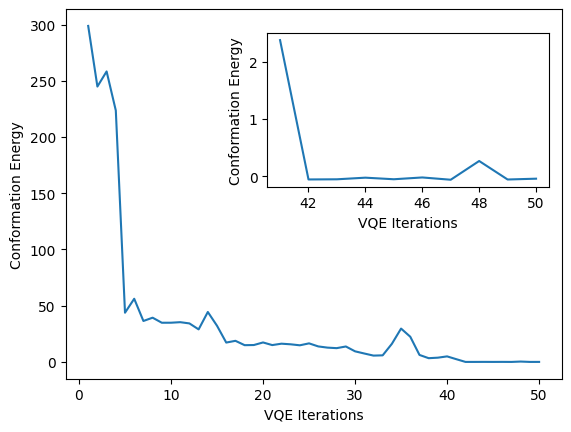

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel('Conformation Energy')
plt.xlabel("VQE Iterations")
fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

In [12]:
result = protein_folding_problem.interpret(raw_result=raw_result)
print(
    "The bitstring representing the shape of the protein during optimization is: ",
    result.turn_sequence,
)
print("The expanded expression is:", result.get_result_binary_vector())

The bitstring representing the shape of the protein during optimization is:  000000111101001001
The expanded expression is: 0_______0_____0_0_________________________________________________________________________________________________________________________________________0_0______________________11__1101001001____


In [13]:
print(
    f"The folded protein's main sequence of turns is: {result.protein_shape_decoder.main_turns}"
)
print(f"and the side turn sequences are: {result.protein_shape_decoder.side_turns}")

The folded protein's main sequence of turns is: [1, 0, 2, 1, 0, 2, 3]
and the side turn sequences are: [None, 3, None, None, None, None, None, None]


In [14]:
print(result.protein_shape_file_gen.get_xyz_data())

[['A' '0.0' '0.0' '0.0']
 ['P' '0.5773502691896258' '0.5773502691896258' '-0.5773502691896258']
 ['R' '1.1547005383792517' '0.0' '-1.1547005383792517']
 ['L' '0.5773502691896258' '-0.5773502691896258' '-1.7320508075688776']
 ['R' '0.0' '-1.1547005383792517' '-1.154700538379252']
 ['F' '-0.5773502691896258' '-0.5773502691896258' '-0.5773502691896261']
 ['R' '0.0' '0.0' '-2.220446049250313e-16']
 ['Y' '0.5773502691896258' '-0.5773502691896258' '0.5773502691896256']
 ['L' '1.1547005383792517' '0.0' '0.0']]


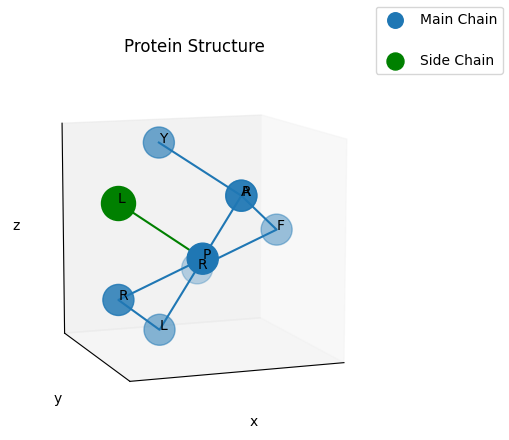

In [16]:
fig = result.get_figure(title="Protein Structure", ticks=False, grid=True)
fig.get_axes()[0].view_init(10, 70)

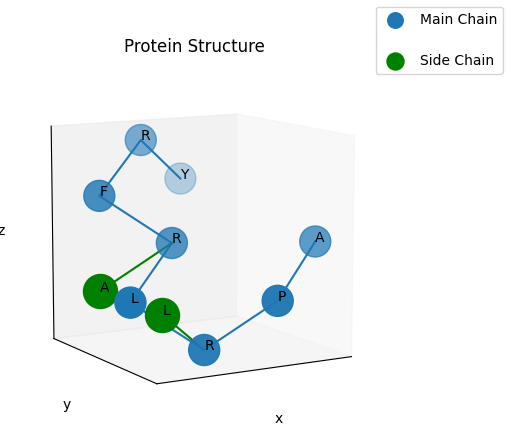

In [17]:
peptide = Peptide("APRLRFRY", ["", "", "L", "", "A","","",""])
protein_folding_problem = ProteinFoldingProblem(peptide, mixed_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize VQE using CVaR with alpha = 0.1
vqe = SamplingVQE(
    Sampler(),
    ansatz=ansatz,
    optimizer=optimizer,
    aggregation=0.1,
    callback=store_intermediate_result,
)

raw_result = vqe.compute_minimum_eigenvalue(qubit_op)
result_2 = protein_folding_problem.interpret(raw_result=raw_result)
fig = result_2.get_figure(title="Protein Structure", ticks=False, grid=True)
fig.get_axes()[0].view_init(10, 60)

In [19]:
print(raw_result)

SamplingMinimumEigensolverResult:
	Eigenvalue: 4.867014277800888
	Best measurement
: {'state': 266857, 'bitstring': '1000001001001101001', 'value': (-1.3570000000017899+0j), 'probability': 7.6681920831e-06}



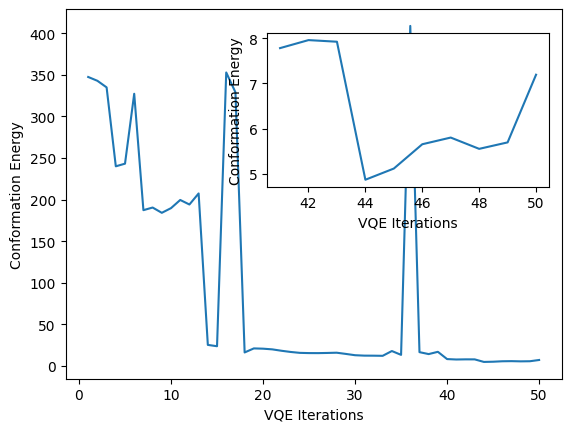

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel('Conformation Energy')
plt.xlabel("VQE Iterations")
fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

In [22]:
result = protein_folding_problem.interpret(raw_result=raw_result)
print(result.protein_shape_file_gen.get_xyz_data())

[['A' '0.0' '0.0' '0.0']
 ['P' '0.5773502691896258' '0.5773502691896258' '-0.5773502691896258']
 ['R' '1.1547005383792517' '0.0' '-1.1547005383792517']
 ['L' '1.7320508075688776' '-0.5773502691896258' '-0.5773502691896258']
 ['R' '1.154700538379252' '-1.1547005383792517' '0.0']
 ['F' '1.7320508075688776' '-1.7320508075688776' '0.5773502691896258']
 ['R' '1.154700538379252' '-2.3094010767585034' '1.1547005383792517']
 ['Y' '0.5773502691896261' '-2.886751345948129' '0.5773502691896258']
 ['L' '1.7320508075688776' '0.5773502691896258' '-0.5773502691896258']
 ['A' '1.7320508075688776' '-1.7320508075688776' '-0.5773502691896258']]
